# Домашнее задание №8.
###### Судаков Илья Александрович

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import poisson
from scipy.stats import gamma
%config InlineBackend.figure_format = 'retina'

## ***Задание 1: интервальное оценивание среднего в нормальной модели (3 балла).***

Целью данного задания является построение асимптотического и неасимптотического доверительных интервалов для математического ожидания в нормальной модели. В начале эксперимента зафиксируйте значения $\theta \in \mathbb{R}$, $\sigma^2 \gt 0.1$ и $\gamma = 0.95$.

1. Сгенерируйте выборку ${\bf X} = (X_1, ... , X_n)$ из нормального закона $\mathcal{N}(\theta, \sigma^2)$.

In [175]:
theta = 2
sigma = 10
gam = 0.95
n = 10000
samples = norm.rvs(theta, sigma, size=n)


2. Постройте $\gamma$-доверительный интервал для параметра $\theta$, считая параметр $\sigma^2$ неизвестным и пользуясь центральной статистикой
$$ G(X,\theta) = \cfrac{\bar X - \theta}{S_0}, $$
где как обычно,
$$ \bar X = \cfrac{1}{n}\sum\limits_{i = 1}^{n}X_i, \;\;\;\; {S_0}^2 = \cfrac{1}{n-1}\sum\limits_{i=1}^{n}(X_i - \bar X)^2 .$$
Для вычисления квантилей распределения Стьюдента воспользуйтесь библиотекой $\texttt{scipy.stats}$ (см. [документацию](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html)). Представьте доверительный интервал в виде $(T_1({\bf X}), T_2({\bf X})).$

In [176]:
X_mean = np.mean(samples)
S_0_2 = np.mean(np.square(samples-X_mean))*(n/(n-1))


t_1 = t.ppf((1-gam)/2, n-1) # они одинкаовые и их второй можно не считать, но для универсальности написал
t_2 = t.ppf((1+gam)/2, n-1)

T_1 = X_mean - np.sqrt(S_0_2)*t_2/np.sqrt(n)
T_2 = X_mean - np.sqrt(S_0_2)*t_1/np.sqrt(n)
print(f'({T_1}, {T_2})')


(1.7324205006643723, 2.1235210395157527)


3. Постройте асимптотический доверительный интервал $(S_1({\bf X}), S_2({\bf X}))$ для параметра $\theta$, считая параметр $\sigma^2$ неизвестным. Для вычисления квантилей нормального распределения снова воспользуйтесь библиотекой $\texttt{scipy.stats}$ (см. [документацию](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html)).

In [177]:
z_1 = norm.ppf((1-gam)/2)
z_2 = norm.ppf((1+gam)/2)   #они одинкаовые и их второй можно не считать, но для универсальности написал

T_1 = X_mean - np.sqrt(S_0_2)*z_2/np.sqrt(n)
T_2 = X_mean - np.sqrt(S_0_2)*z_1/np.sqrt(n)
print(f'({T_1}, {T_2})')

(1.732444171697107, 2.123497368483018)


4. Выполните задания пп. 1 – 3 по $M = 500$ раз для каждого объема выборки $n \in \{3, 5, 10, 50, 100, 1000, 10000\}$.

In [178]:
def CountIntervals(n):
    samples = norm.rvs(theta, sigma, size=n)
    X_mean = np.mean(samples)
    S_0_2 = np.mean(np.square(samples-X_mean))*(n/(n-1))

    t_1 = t.ppf((1-gam)/2, n-1)
    t_2 = t.ppf((1+gam)/2, n-1)

    T_1 = X_mean - np.sqrt(S_0_2)*t_2/np.sqrt(n)
    T_2 = X_mean - np.sqrt(S_0_2)*t_1/np.sqrt(n)    

    z_1 = norm.ppf((1-gam)/2)
    z_2 = norm.ppf((1+gam)/2)

    S_1 = X_mean - np.sqrt(S_0_2)*z_2/np.sqrt(n)
    S_2 = X_mean - np.sqrt(S_0_2)*z_1/np.sqrt(n)

    return T_1, T_2, S_1, S_2


In [179]:
N = [3, 5, 10, 50, 100, 1000, 10000]
M = 500
lens_T = []
lens_S = []

for n in N:
    len_T = 0
    len_S = 0
    for i in range(M):
        T_1, T_2, S_1, S_2 = CountIntervals(n)
        len_T += T_2-T_1
        len_S += S_2-S_1
    lens_T.append(len_T/M)
    lens_S.append(len_S/M)


5. Постройте график зависимости усредненных по $M$ повторениям размеров доверительных интервалов $(T_1({\bf X}), T_2({\bf X}))$ и $(S_1({\bf X}), S_2({\bf X}))$ от объема выборки $n$. Убедитесь, что доверительные интервалы уменьшаются с ростом $n$. Для какого из двух методов размер доверительного интервала меньше?

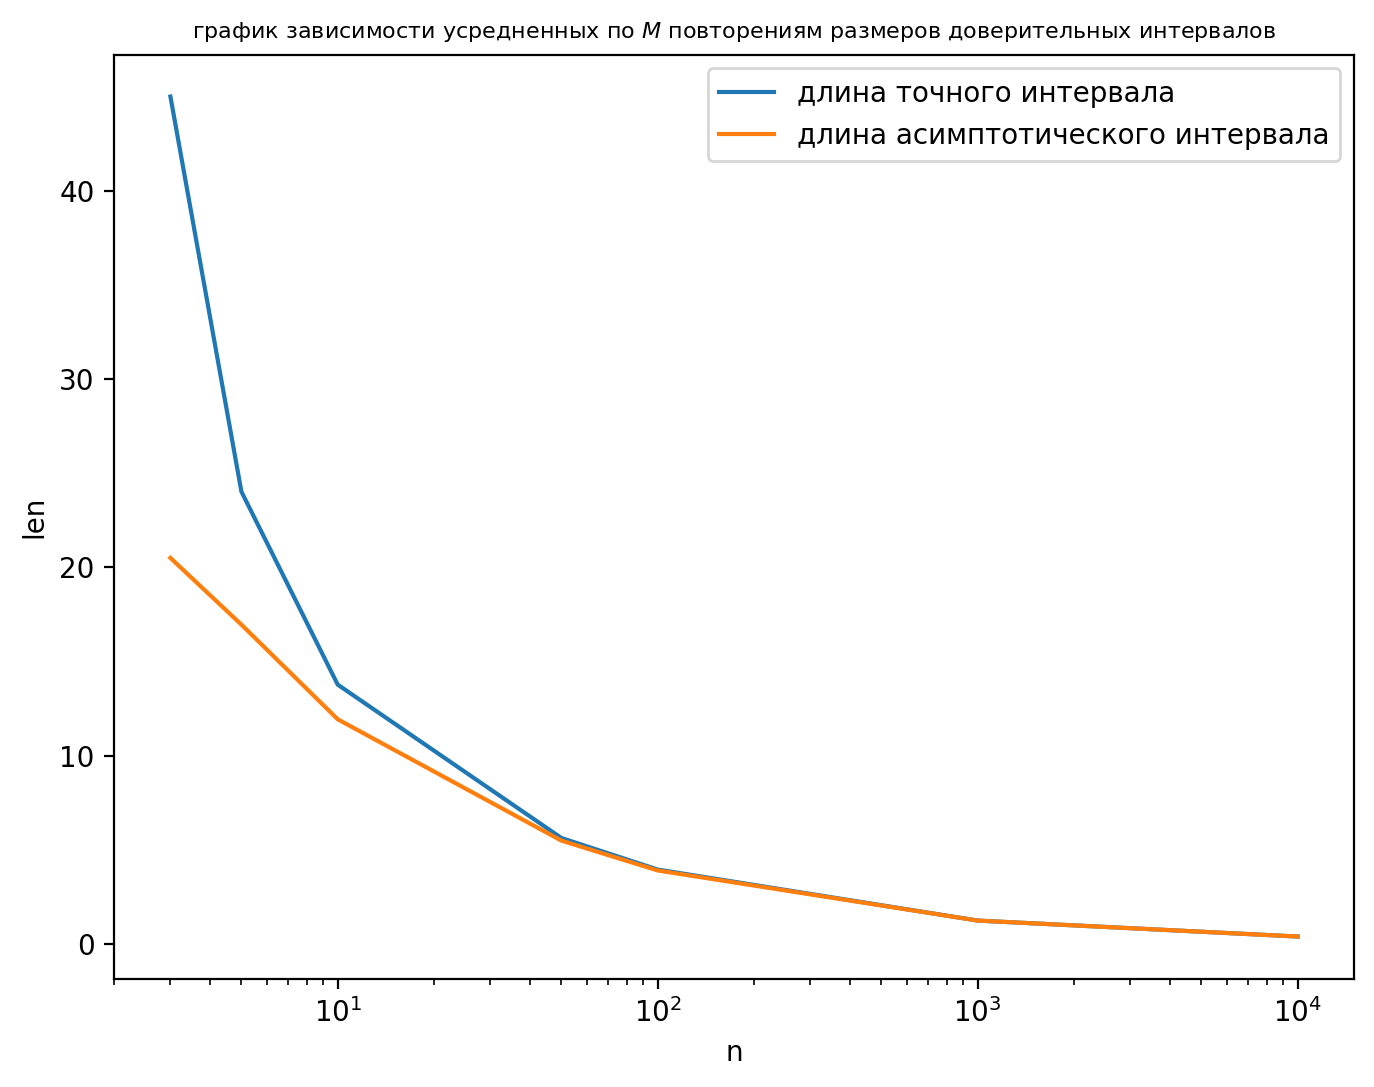

In [180]:
plt.figure(figsize=(8, 6))
plt.semilogx(N, lens_T, label="длина точного интервала")
plt.semilogx(N, lens_S, label="длина асимптотического интервала")
plt.title("график зависимости усредненных по $M$ повторениям размеров доверительных интервалов", fontsize=8)
plt.xlabel("n")
plt.ylabel("len")
plt.legend()
plt.show()


Далее для каждого n постройте оценку $\hat{\gamma}(n) = P_θ[T_1(X) < θ < T_2(X)]$ по $M$
повторениям процедуры. Постройте график зависимости $\hat{\gamma}(n)$ от $n$, сделайте выводы о разнице между не-асимптотическим и асимптотическими доверительными
интервалами.

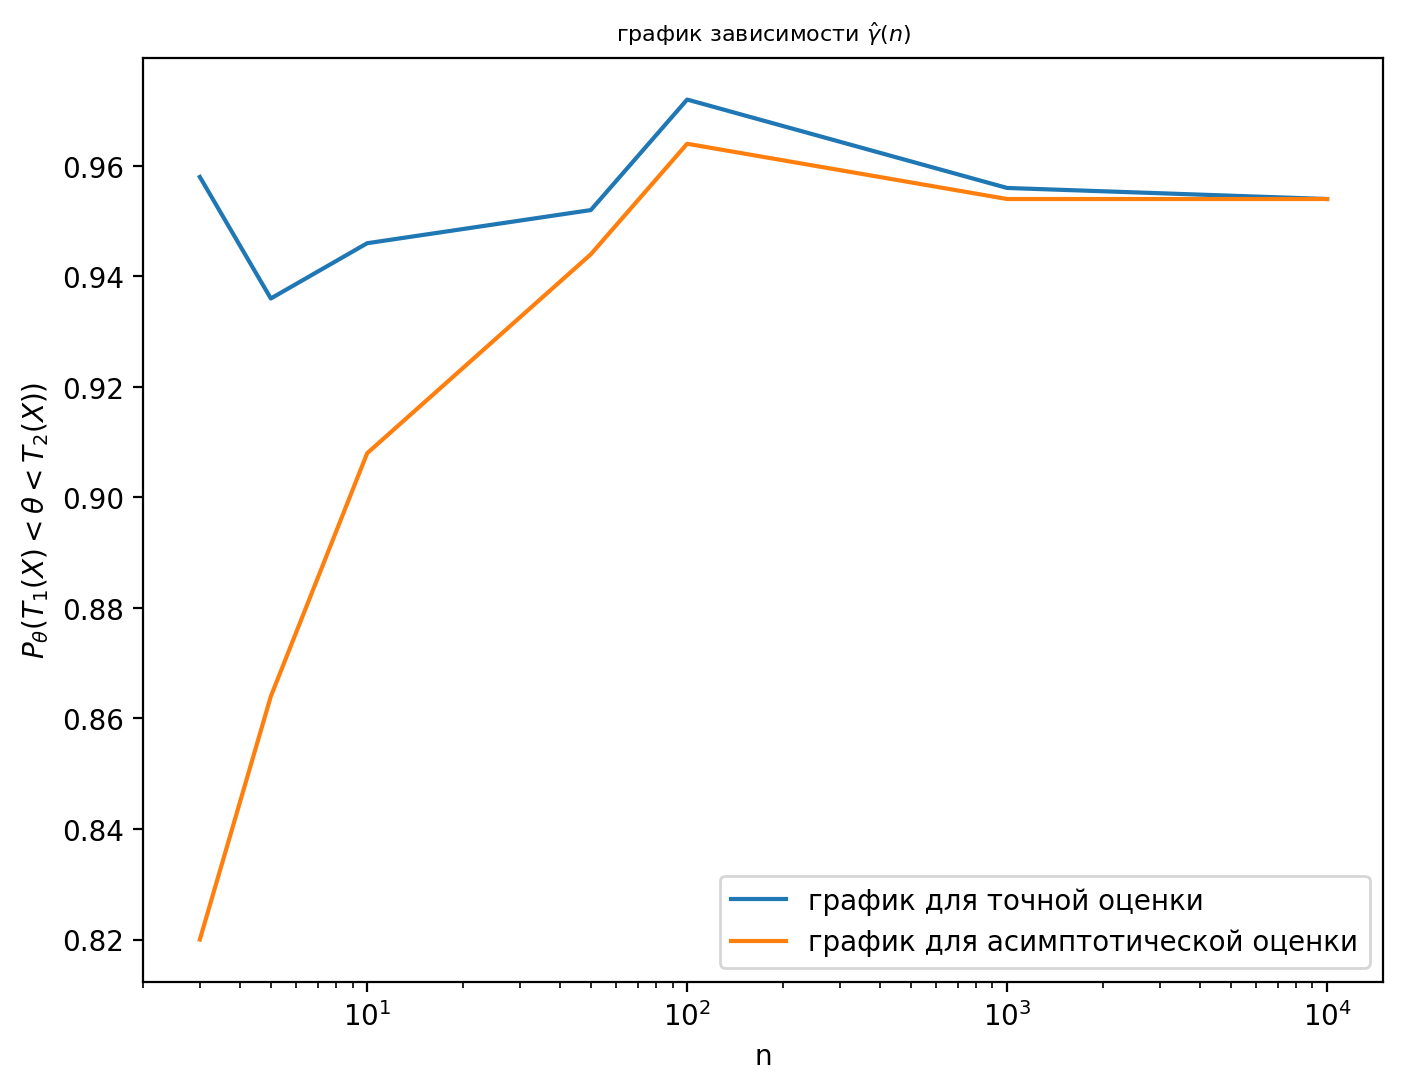

In [181]:
N = [3, 5, 10, 50, 100, 1000, 10000]
M = 500
gam1 = []
gam2 = []

theta = 5
sigma = 2

for n in N:
    sum1 = 0
    sum2 = 0

    t_1 = t.ppf((1-gam)/2, n-1)
    t_2 = t.ppf((1+gam)/2, n-1)

    z_1 = norm.ppf((1-gam)/2)
    z_2 = norm.ppf((1+gam)/2)

    for i in range(M):
        samples = norm.rvs(theta, sigma, size=n)
        X_mean = np.mean(samples)
        S_0_2 = np.mean(np.square(samples-X_mean))*(n/(n-1))

        T_1 = X_mean - np.sqrt(S_0_2)*t_2/np.sqrt(n)
        T_2 = X_mean - np.sqrt(S_0_2)*t_1/np.sqrt(n)  

        S_1 = X_mean - np.sqrt(S_0_2)*z_2/np.sqrt(n)
        S_2 = X_mean - np.sqrt(S_0_2)*z_1/np.sqrt(n)

        if T_1 < theta < T_2:
            sum1 += 1

        if S_1 < theta < S_2:
            sum2 += 1

    gam1.append(sum1/M)
    gam2.append(sum2/M)

plt.figure(figsize=(8, 6))
plt.semilogx(N, gam1, label = "график для точной оценки")
plt.semilogx(N, gam2, label = "график для асимптотической оценки")
plt.title("график зависимости $\hat{\gamma}(n)$", fontsize=8)
plt.xlabel("n")
plt.ylabel("$P_θ(T_1(X) < θ < T_2(X))$")
plt.legend()
plt.show()


## ***Задание 2: Доверительный интервал для распределения Пуассона (7 баллов).***

Целью данного задания является построение точного и асимптотического доверительных интервалов для параметра распределения Пуассона.

*Теоретическая часть (4 балла).* Решите следующие задачи:
- **Задача1** (1 балл). Используя статистики $\bar X = (X_1 + \dots + X_n)/n$ и $\sqrt{\bar X}$ постройте асимптотический $\gamma$-доверительный интервал для параметра $\theta$.
- **Задача2** (3 баллa). Пусть дана выборка $(X_1, ... , X_n)$ из распределения Пуассона $\operatorname{Poisson}(\theta),\;\; \theta \gt 0$. Основываясь на точечной оценке $\bar X = (X_1 + \dots + X_n)/n$, покажите, что концы $\gamma$-доверительного интервала $(\hat\theta_1, \hat\theta_2)$ для параметра $\theta$ определяется из уравнений
$$ \cfrac{1}{(n\bar X)!} \int\limits_{n\hat\theta_1}^{+\infty} x^{n\bar X} e^{-x} \text{d}x = \cfrac{1 + \gamma}{2} \text{ и } \cfrac{1}{(n\bar X)!} \int\limits_{n\hat\theta_2}^{+\infty} x^{n\bar X} e^{-x} \text{d}x = \cfrac{1 - \gamma}{2}$$

**Указание.** Докажите следующую формулу, связывающую квантили распределения Пуассона $\operatorname{Poisson}(n\theta)$ с неполной гамма-функцией:
$$\sum\limits_{j = 0}^{k} \cfrac{(n\theta)^j}{j!}e^{-n\theta} = \cfrac{1}{k!}\int\limits_{n\theta}^{+\infty} x^k e^{-x}\text{d}x.$$

*Практическая часть (3 балла).* В начале эксперимента зафиксируйте значения $\theta > 0$ и $\gamma = 0.95$.

1. Сгенерируйте выборку $X_1, .. X_n$ из распределения Пуассона $\operatorname{Poisson}(\theta)$.

In [182]:
theta = 2
gam = 0.95
n = 10000
samples = poisson.rvs(theta, size=n)


2. Взяв табличное значение квантиля стандартного гауссовского распределения, постройте асимптотический $\gamma$-доверительный интервал $(S_1({\bf X}), S_2({\bf X}))$, основанный на статистиках $\bar X$ и $\sqrt{\bar X}$.

In [183]:
X_mean = np.mean(samples)
sqrt_X_mean = np.sqrt(np.mean(samples))
X_sum = np.sum(samples)

Z = norm.rvs((1+gam)/2)

T_1 = (Z**2)/2/n + X_mean - Z*np.sqrt(X_mean)/np.sqrt(n)
T_2 = (Z**2)/2/n + X_mean + Z*np.sqrt(X_mean)/np.sqrt(n)

print(f'({T_1}, {T_2})')
print(f'len = {T_2 -T_1}')


(1.9747693730710236, 2.014023791113889)
len = 0.039254418042865336


3. При помощи библиотеки $\texttt{scipy.stats}$ найдите решения $\hat\theta_1$ и $\hat\theta_2$ уравнений (1) и выведите доверительный интервал $(\hat\theta_1, \hat\theta_2)$. Обратите внимание, что функция
$$\cfrac{1}{k!}\int\limits_{n\theta}^{+\infty}x^ke^{-x}\text{d}x$$
связана с квантилями гамма-распределения.

In [184]:
t_1 = gamma.ppf((1-gam)/2, X_sum+1)
t_2 = gamma.ppf((1+gam)/2, X_sum+1)

T_1 = t_1/n
T_2 = t_2/n
print(f'({T_1}, {T_2})')
print(f'len = {T_2 -T_1}')


(1.9668155927392286, 2.022173837165898)
len = 0.05535824442666937


4. Выполните задания пп. 1 – 3 по $M = 500$ раз для каждого объема выборки $n \in \{3, 5, 10, 50, 100, 1000, 10000\}$.

In [185]:
def CountIntervalsPoisson(n):
    samples = poisson.rvs(theta, size=n)

    X_mean = np.mean(samples)
    X_sum = np.sum(samples)

    Z = norm.ppf((1+gam)/2)

    T_1 = (Z**2)/2/n + X_mean - Z*np.sqrt(X_mean)/np.sqrt(n)
    T_2 = (Z**2)/2/n + X_mean + Z*np.sqrt(X_mean)/np.sqrt(n)

    t_1 = gamma.ppf((1-gam)/2, X_sum+1)
    t_2 = gamma.ppf((1+gam)/2, X_sum+1)

    S_1 = t_1/n
    S_2 = t_2/n

    return T_1, T_2, S_1, S_2


In [186]:
N = [3, 5, 10, 50, 100, 1000, 10000]
M = 500
lens_T = []
lens_S = []

for n in N:
    len_T = 0
    len_S = 0
    for i in range(M):
        T_1, T_2, S_1, S_2 = CountIntervalsPoisson(n)
        len_T += T_2-T_1
        len_S += S_2-S_1
    lens_T.append(len_T/M)
    lens_S.append(len_S/M)


5. Постройте график зависимости усредненных по $M$ повторениям размеров доверительных интервалов $(\hat\theta_1, \hat\theta_2)$ и $(S_1({\bf X}), S_2({\bf X}))$ от объема выборки $n$. Убедитесь, что доверительные интервалы уменьшаются с ростом $n$. Для какого из двух методов размер доверительного интервала меньше?

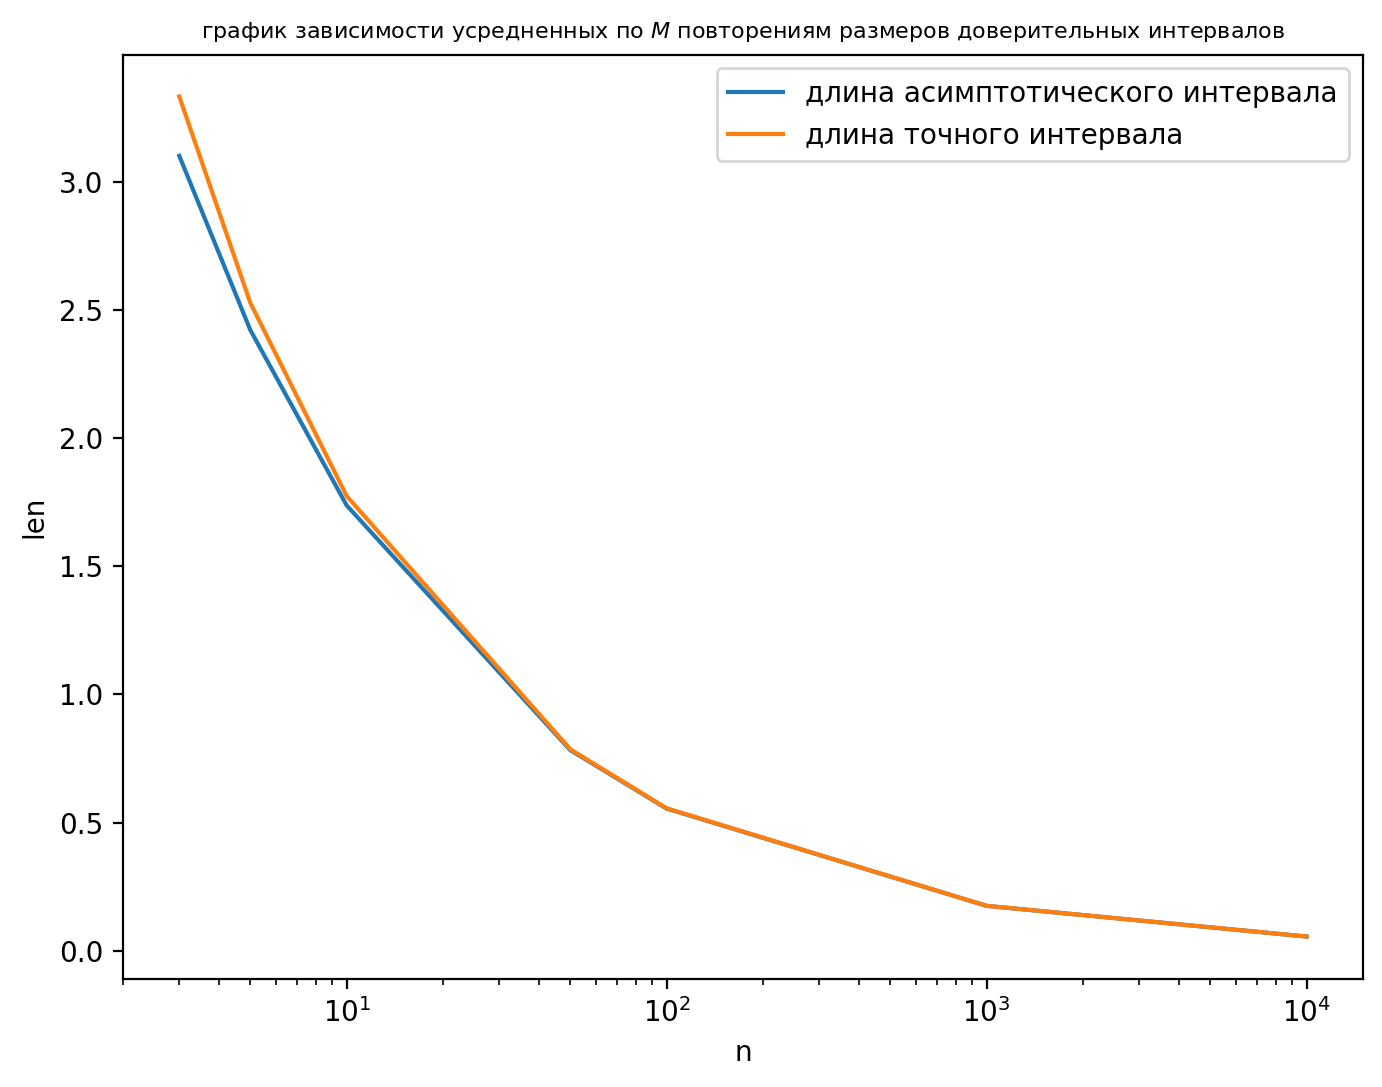

In [187]:
plt.figure(figsize=(8, 6))
plt.semilogx(N, lens_T, label="длина асимптотического интервала")
plt.semilogx(N, lens_S, label="длина точного интервала")
plt.title("график зависимости усредненных по $M$ повторениям размеров доверительных интервалов", fontsize=8)
plt.xlabel("n")
plt.ylabel("len")
plt.legend()
plt.show()


Из графика видим что интервалы уменьшаются с ростом n, для асимптотического интервала размер немного меньше